# Лабораторная работа №1: Исследование двумерного нормального распределения
Выполнила студентка гр. 1384 Пчелинцева Кристина. Вариант №13

## Цель работы
Исследовать свойства двумерного случайного вектора имеющего нормальное распределение, приобрести навыки преобразования нормального вектора в стандартный и в вектор с независимыми компонентами.

## Основные теоретические положения

Случайный вектор $\vec{\xi}=(\xi_{1},..,\xi{n})^{\intercal}:\Omega \rightarrow \mathsf{R^n}$ называется нормальным, если $\exists$ вектор независимых стандартных нормальных случайных велечин  $\vec{\eta}=(\eta_{1},..,\eta_{m})^{\intercal}$, матрица А размерности $n\times m$ и вещественный вектор $B = (b_{1},..,b_{n})^{\intercal}$, такие что $\vec{\xi} = A\vec{\eta}+B$

Плотность многомерного невыражденного нормального распределения имеет вид:
    $p_{\vec{\xi}}(x_{1},..x_{n}) = \frac{1}{(2\pi)^\frac{n}{2}\sqrt{det\Sigma}}\exp (-\frac{1}{2}(\vec{x}-\vec{\mu})^{\intercal}\Sigma^{-1}(\vec{x}-\vec{\mu})^{\intercal})$, где $\vec{\mu}= \mathbb{E} \vec{\xi}=(\vec{\xi_{1}},..,\vec{\xi}_{n})^{\intercal}$ - вектор математических ожиданий компоненит, $\Sigma$={$\sigma_{i,j}=cov(\xi_{i},\xi_{j})$}$^n_{i,j=1}$ - ковариационная матрица.

Свойства:

Линейные комбинации случайных переменных, принадлежащих многомерному нормальному распределению, также является нормально распределенными.

Условные и безусловные распределения, полученные из многомерного нормального распределения, также являются нормально распределенными. 

Параметры многомерного нормального распределения (средние и ковариационная матрица) полностью описывают его форму.

 Многомерное нормальное распределение устойчиво относительно линейных преобразований. Если $\vec{\xi}\thicksim \mathcal{N} (\vec{\mu},\Sigma), A$ - произвольная матрица размерности $n\times m, \vec{b}$ - произвольный вектор размерности $n\times 1$, то $A\vec{\xi} + \vec{b}\thicksim\mathcal{N}(A\vec{\mu} + \vec{b}, A \Sigma A^{\intercal})$


## Постановка задачи
Для заданного двумерного нормального вектора необходимо вычислить числовые характеристики и выполнить заданные преобразования. Полученные результаты содержательно проинтерпретировать.

$p_{\xi,\eta} (x, y) = C\cdot\exp(-\frac{1}{2}(2x^2+4xy+5y^2-18y+27))$


## Выполнение работы
### 1. Вычислить вектор математических ожиданий  ковариационные характеристики данного случайного вектора. Построить график плотности распредления $p_{ \xi,\eta}$

Для выполнения задания начнем с преобразования Лагранжа:
$q(x, y)=2x^2+4xy+5y^2-18y+27=2(x^2+xy)+5y^2-18y+27=2(x^2+2xy+y^2)-2y^2+5y^2-18y+27=2(x+y)^2+3(y-3)^2=2(x+3+y-3)^2+3(y-3)^2=2(x+3)^2+4(x+3)(y-3)+5(y-3)^2$    

Выпишем вектор математических ожиданий и обратную ковариационную матрицу.

$\mathbb{E} \binom{\xi}{\eta} = \binom{-3}{3}$ 

$\Sigma^{-1} = \begin{pmatrix} 2&2 \\ 2&5 \end{pmatrix} \implies \det{\Sigma^{-1}} = 10-4 = 6$

$\Sigma = \frac{1}{\det{\Sigma^{-1}}} \cdot \begin{pmatrix} 5 & -2 \\ -2 & 2 \end{pmatrix} = \frac{1}{6} \cdot \begin{pmatrix} 5 & -2 \\ -2 & 2 \end{pmatrix}$

Из $\Sigma$ матрицы мы получаем следующие характеристики:

$\mathbb{D}\xi = \frac{5}{6}, \mathbb{D}\eta = \frac{1}{3}, \mathop{\mathrm{cov}}\nolimits(\xi, \eta) = -\frac{1}{3}$

Найдем СКО, коэффициент корреляции и С:
$\rho_{\xi,\eta} = \frac{\mathop{\mathrm{cov}}\nolimits(\xi, \eta) }{\sigma_{\xi} \cdot \sigma_{\eta}} = \frac{-\frac{1}{3}} {\sqrt{\frac{5}{6} \cdot \frac{1}{3}}} = -\frac{\sqrt{10}}{5}$

$C = \frac{1}{2\pi \cdot \sqrt{\frac{1}{\det(\Sigma)^{-1}}}} = \frac{1}{2\pi \cdot \sqrt{\frac{1}{6}}} = \frac{\sqrt{6}}{2\pi}$

Тогда плотность распределения будет равна:

$P_{\xi,\eta}(x,y) = \frac{\sqrt{6}}{2\pi} \cdot exp\left\{ -\frac{1}{2} \cdot \left[ \begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} -3 \\ 3 \end{pmatrix}\right]^{\intercal} \cdot \begin{pmatrix} 2 & 2 \\ 2 & 5 \end{pmatrix}  \cdot \left[\begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} -3 \\ 3 \end{pmatrix} \right] \right\}$

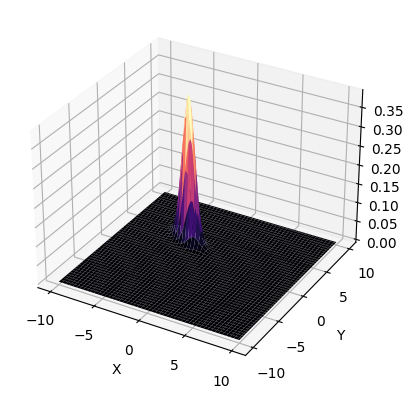

In [4]:
## График плотности распределения к №1.
import numpy as np
import matplotlib.pyplot as plt

def density(x, y):
    mean = np.array([-3, 3])
    covariance = np.array([[2, 2], [2, 5]])
    diff = np.stack((x, y), axis=-1) - mean
    exponent = -0.5 * np.einsum('...k,kl,...l->...', diff, covariance, diff)
    return np.sqrt(6) / (2 * np.pi) * np.exp(exponent)

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

Z = density(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='magma')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

## 2. Найти аффинное преобразование, переводящее исходный случайный вектор в стандартный нормальный.

$q(x,y)=2(x+y)^2+3(y-3)^2=\left(\frac{2x}{\sqrt{2}} + \frac{2y}{\sqrt{2}}\right)^{2} + \left(\frac{3y}{\sqrt{3}} - \frac{9}{\sqrt{3}}\right)^{2}$

$\begin{pmatrix} \xi_{st} \\ \eta_{st} \end{pmatrix} = \begin{pmatrix} \frac{2}{\sqrt{2}} & \frac{2}{\sqrt{2}} \\ 0 & \frac{3}{\sqrt{3}} \end{pmatrix} \cdot \begin{pmatrix} \xi \\ \eta \end{pmatrix} + \begin{pmatrix} 0 \\ -\frac{9}{\sqrt{3}} \end{pmatrix} = \begin{pmatrix} \frac{2}{\sqrt{2}}\xi + \frac{2}{\sqrt{2}}\eta \\ \frac{3}{\sqrt{3}}\eta - \frac{9}{\sqrt{3}} \end{pmatrix}$

$M = \mathbb{E}\begin{pmatrix} \xi_{st} \\ \eta_{st} \end{pmatrix} = \begin{pmatrix} \frac{2}{\sqrt{2}} & \frac{2}{\sqrt{2}} \\ 0 & \frac{3}{\sqrt{3}} \end{pmatrix} \cdot \begin{pmatrix} -3 \\ 3 \end{pmatrix} + \begin{pmatrix} 0 \\ -\frac{3}{\sqrt{3}} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$

$\Sigma_{st} = A \cdot \Sigma \cdot A^{\intercal} = \frac{1}{6} \cdot \begin{pmatrix} \frac{2}{\sqrt{2}} & \frac{2}{\sqrt{2}} \\ 0 & \frac{3}{\sqrt{3}} \end{pmatrix} \cdot \begin{pmatrix} 5 & -2 \\ -2 & 2 \end{pmatrix} \cdot \begin{pmatrix} \frac{2}{\sqrt{2}} & 0 \\ \frac{2}{\sqrt{2}} & \frac{3}{\sqrt{3}} \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$

### 3. Найти ортогональное преобразование, переводящее соответствующий центрированный случайный вектор в вектор с независимыми компонентами. Построить график плотности полученного распределения.

$\Sigma^{-1} = \begin{pmatrix} 2 & 2 \\ 2 & 5 \end{pmatrix}$

Посчитаем определитель и найдем $\lambda$:

$\begin{vmatrix} 2-\lambda & 2 \\ 2 & 5-\lambda \end{vmatrix} = (2-\lambda) \cdot (5-\lambda)-4 = 10-2\lambda-5\lambda+\lambda^{2}-4 = \lambda^{2}-7\lambda+6 = (\lambda-1)(\lambda-6)$

Откуда $\lambda_{1}=1; \lambda_{2}=6$

$ Рассмотрим случай, когда $\lambda_{1}=1$:

$\begin{pmatrix} 2-\lambda_{1} & 2 \\ 2 & 5-\lambda_{1} \end{pmatrix}v_{1} = 0 \Leftrightarrow \begin{pmatrix} 1 & 2 \\ 2 & 4 \end{pmatrix}v_{1} = 0$
$\Rightarrow \vec{v_{1}} = \begin{pmatrix} 2 \\ -1\end{pmatrix}$

$\left\| \overrightarrow{\mathrm{v_{1}}} \right\| = \sqrt{2^{2}+{(-1)}^{2}} = \sqrt{5} \implies \overrightarrow{\mathrm{v}_{1}^{'}} = \begin{pmatrix} \frac{2}{\sqrt{5}} \\ -\frac{1}{\sqrt{5}} \end{pmatrix}$

$ Рассмотрим случай, когда $\lambda_{2}=6$:

$\begin{pmatrix} 2-\lambda_{2} & 2 \\ 2 & 5-\lambda_{2} \end{pmatrix}v_{2} = 0 \Leftrightarrow \begin{pmatrix} -4 & 2 \\ 2 & -1 \end{pmatrix}v_{2} = 0$
$\Rightarrow \vec{v_{2}} = \begin{pmatrix} 1 \\ 2\end{pmatrix} = \vec{v_{2}} = \begin{pmatrix} 1 \\ 2\end{pmatrix}\frac{1}{\sqrt{5}}$


Матрица ортогогального преобразования:
$Q^{\intercal} = \frac{1}{\sqrt5} \begin{pmatrix} 2 & 1 \\ -1 & 2 \end{pmatrix} \Rightarrow Q = \frac{1}{\sqrt5} \begin{pmatrix} 2 & -1 \\ 1 & 2 \end{pmatrix}
$

$\begin{pmatrix} \xi_{ort} \\ \eta_{ort} \end{pmatrix} = Q \begin{pmatrix} \xi \\ \eta \end{pmatrix} = \frac{1}{\sqrt{5}} \begin{pmatrix} 2\xi - \eta \\ \xi + 2\eta \end{pmatrix}$

$\mathbb{E} \begin{pmatrix} \xi_{ort} \\ \eta_{ort} \end{pmatrix} =
\frac{1}{\sqrt5}\begin{pmatrix} 2\mathbb E \xi - \mathbb E\eta \\ \mathbb E\xi + 2\mathbb E \eta \end{pmatrix} =
 \frac{1}{\sqrt{5}} \begin{pmatrix} 2\cdot(-3) -1\cdot3 \\ 1\cdot(-3) + 2\cdot3 \end{pmatrix} =
  \frac{1}{\sqrt{5}} \begin{pmatrix} -9 \\ 3 \end{pmatrix}$

$\Sigma_{ort} = \frac{1}{6} \cdot \frac{1}{5} \begin{pmatrix} 2 & -1 \\ 1 & 2 \end{pmatrix}  
\begin{pmatrix} 5 & -2 \\ -2 & 2 \end{pmatrix} 
\begin{pmatrix} 2 & 1 \\ -1 & 2 \end{pmatrix}
= \frac{1}{30} \begin{pmatrix} 6 & 0 \\ 0 & 1 \end{pmatrix} =  
\begin{pmatrix}  1 & 0 \\ 0 &  \frac{1}{6} \end{pmatrix} $

$\Sigma^{-1}_{ort} = \begin{pmatrix} 1 & 0 \\ 0 & 6 \end{pmatrix}$

$\mathbb{D}\xi_{ort} = 1 \;\; \mathbb{D}\eta_{ort} = \frac{1}{6} $


$\sigma_{\xi} = \sqrt{1} = 1; \sigma_{\eta} = \frac{1}{\sqrt{6}}$

$C = \frac{1}{2\pi \cdot \frac{1}{\sqrt{6}}} = \frac{\sqrt{6}}{2\pi}$

Запишем плотность полученного распределения: 

$p_{\xi,\eta}(x,y) = \frac{\sqrt{6}}{2\pi} \cdot exp\left\{-\frac{1}{2} \cdot \left[\begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} \frac{-9}{\sqrt{5}} \\ \frac{3}{\sqrt{5}} \end{pmatrix}\right]^{\intercal} \cdot \begin{pmatrix} 1 & 0 \\ 0 & 6 \end{pmatrix} \cdot \left[\begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} \frac{-9}{\sqrt{5}} \\ \frac{3}{\sqrt{5}} \end{pmatrix} \right] \right\}$




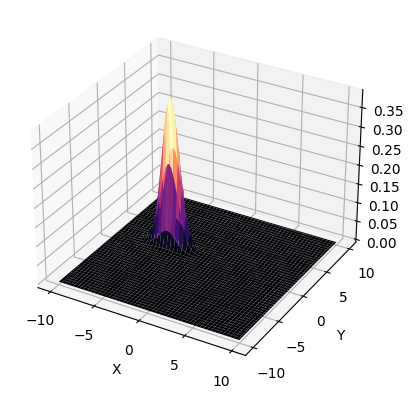

In [13]:
## График плотности распределения к №3.
import numpy as np
import matplotlib.pyplot as plt

def density(x, y):
    mean = np.array([-9/np.sqrt(5), 3/np.sqrt(5)])
    covariance = np.array([[1, 0], [0, 6]])
    diff = np.stack((x, y), axis=-1) - mean
    exponent = -0.5 * np.einsum('...k,kl,...l->...', diff, covariance, diff)
    return np.sqrt(6) / (2 * np.pi) * np.exp(exponent)

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

Z = density(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='magma')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

### 4. Вычислить характеристики совместного распределения случайного вектора $(-5ξ + 4η, -4ξ + 2η)^{\intercal}$ и записать его плотность. Построить график плотности полученного распределения.


Пусть
$\begin{pmatrix} \xi_{4} \\ \eta_{4} \end{pmatrix} = \begin{pmatrix} -5\xi + 4\eta \\ -4\xi +2 \eta \end{pmatrix}$

$A = \begin{pmatrix} -5 & 4 \\ -4 & 2 \end{pmatrix}$

$\det A = 6 $ 


Матрица A невырожденная, значит можем вычислить характеристики распределения.

$\begin{pmatrix} \xi_{4} \\ \eta_{4} \end{pmatrix} = \begin{pmatrix} -5 & 4 \\ -4 & 2 \end{pmatrix} \begin{pmatrix} \xi \\ \eta \end{pmatrix}$

$\mathbb{E} \begin{pmatrix} \xi_{4} \\ \eta_{4} \end{pmatrix} 
= \begin{pmatrix} -5 & 4 \\ -4 & 2 \end{pmatrix} 
\begin{pmatrix} -3 \\ 3 \end{pmatrix} =
 \begin{pmatrix} 27 \\ 18 \end{pmatrix} =9\cdot \begin{pmatrix} 3 \\ 2 \end{pmatrix}$ 
 
$\Sigma_{4} = \frac{1}{6} \begin{pmatrix} -5 & 4 \\ -4 & 2 \end{pmatrix}  \begin{pmatrix} 5 & -2 \\ -2 & 2 \end{pmatrix} \begin{pmatrix} -5 & -4 \\ 4 & 2  \end{pmatrix} = \frac{1}{6}\begin{pmatrix} 237 & 168 \\ 168 & 120 \end{pmatrix} = \begin{pmatrix} \frac{79}{2} & 28 \\ 28 & 20 \end{pmatrix}$

$\Sigma_{4}^{-1} = 1 \cdot 
\begin{pmatrix} 237 & 168 \\ 168 & 120 \end{pmatrix}$

$\mathbb{D}\xi_{4} = \frac{79}{2} \;\; \mathbb{D}\eta_{4} = 20$

$cov(\xi, \eta) = 28$

$p_(\xi, \eta) = \frac{28}{\sqrt{\frac{79}{2} \cdot 20}} 
= \frac{14\sqrt{790}}{395}$


$C = \frac{1}{2\pi \cdot \sqrt{\det{\Sigma_{4}}}} = \frac{1}{2\pi \cdot \sqrt{6}} = \frac{1}{2\pi \sqrt{6}}$


Запишем плотность распределения: 

$P_{\xi,\eta}(x,y) = \frac{1}{2\pi \sqrt{6}} \cdot exp \left\{-\frac{1}{2} \cdot \left[\begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} 27 \\ 18 \end{pmatrix} \right]^{\intercal} \cdot \begin{pmatrix} \frac{79}{2} & 28 \\ 28 & 20 \end{pmatrix} \cdot \left[ \begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} 27 \\ 18 \end{pmatrix} \right]\right\}$




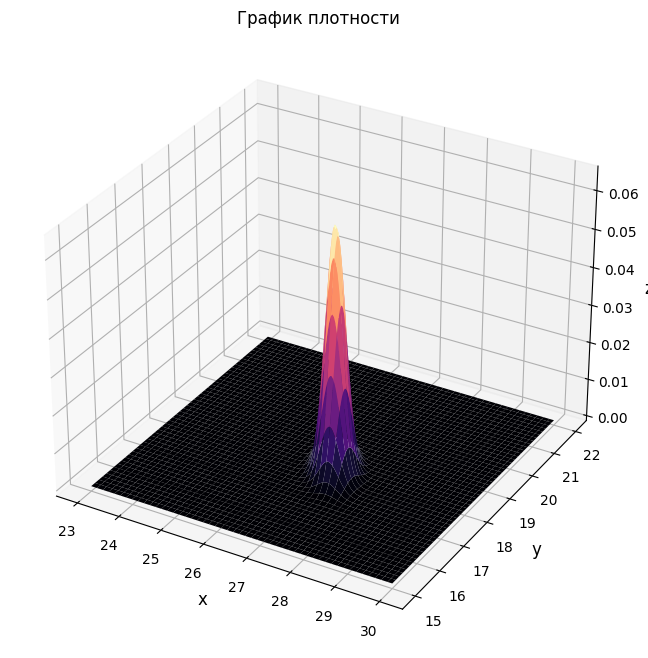

In [12]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def p(x, y):
    return (1 / (2 * np.pi*np.sqrt(6))) * np.exp(-0.5 * (1/2) * ((79/2)*x**2 - (5274/2)*x + (97767/2) + 28*x*y -1476*y + 20*y**2))


x = np.linspace(23, 30, 200)
y = np.linspace(15, 22, 200)

X, Y = np.meshgrid(x, y)
Z = p(X, Y)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap='magma')
ax.set_title('График плотности')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()

### 5. Найти условное распределение $\xi$ при условии $\eta$. Вычислить $\mathbb{E}(\xi|\eta)$ и $\mathbb{D}(\xi|\eta)$.

$P_{(\xi|\eta=y)} = \frac{P_{\xi,\eta}(x,y)}{P_{\eta}(y)}$

Возьмем некоторые данные из №1:

$\mathbb{E}_{\eta} = 3$

$\mathbb{D}_{\eta} = \frac{1}{3}$

$P_{\eta}(y) = \frac{1}{\sqrt{2\pi}\cdot\frac{1}{\sqrt{3}}}\cdot\exp \left(-3\cdot\frac{(y-3)^2}{2}\right) = \frac{\sqrt{3}}{\sqrt{6\pi}}\cdot \exp \left(-\frac{1}{2} \left(3y^2 - 18y + 27 \right) \right)$    


$p_{\xi|\eta=y}(x) = \frac{p_{\xi,\eta}(x,y)}{p_{\eta}(y)}$


$P_{(\xi|\eta=y)} = \frac{\frac{\sqrt{6}}{2\pi} \cdot 
    exp{(-\frac{1}{2}(2x^{2} + 4xy+ 5y^{2} - 18y + 27))}}
    {\frac{\sqrt{3}}{\sqrt{2\pi}} \cdot exp{(-\frac{1}{2}(3y^{2}-18y +27))}} = 
    \frac{\sqrt{3\pi}}{3\pi} \cdot 
    exp{(-\frac{1}{2}(2x^{2}+4xy+5y^{2}-18y+27-3y^{2}+18y-27))} 
    = \frac{1}{\sqrt{3\pi}} \cdot exp{(-\frac{1}{2}(2x^{2}+4xy+2y^{2}))} =
     \frac{1}{\sqrt{3\pi}} \cdot exp{(-\frac{1}{2}(2(x^{2}-2xy+y^{2})))} 
     = \frac{1}{\sqrt{3\pi}} \cdot exp{(-\frac{1}{2}\cdot2(x+y)^{2})}$   

$\Rightarrow \mathbb{E}(\xi|\eta=y) = -y$
   
$\mathbb{D}(\xi|\eta=y) = \frac{1}{2}$

## Выводы

В ходе данной лабораторной работы были изучены свойства двумерного случайного вектора имеющего нормальное распределение, проведены вычисления и построены различные графики плотностей, а также приобретены навыки преобразования нормального вектора в стандартный и в вектор с независимыми компонентами. 

Были вычислены: вектор математических ожиданий, ковариационные характеристики данного случайного вектора, афинное преобразование, отрогональное преобразование, характеристики совместного распределения случайного вектора и его плотность, условное распределение $\xi$ при условии $\eta$, а так же $\mathbb{E}(\xi|\eta)$ и $\mathbb{D}(\xi|\eta)$.